In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from PIL import Image
from skimage import exposure
import cv2
import os
from shutil import copyfile
from defaults import Config as defaults
import tensorflow as tf
from model import Model
tf.logging.set_verbosity(tf.logging.ERROR)

In [6]:
print cv2.__version__
import distance


3.4.0


In [23]:
test_image_files = []
imagePath = 'images/'
rotatedPath = 'rotated/'
if not os.path.isdir(imagePath + rotatedPath):
    os.mkdir(imagePath + rotatedPath)
savedPath = 'saved/'
if not os.path.isdir(imagePath + savedPath):
    os.mkdir(imagePath + savedPath)
testF = []
for (dirpath, dirnames, filenames) in os.walk(imagePath):
    testF.extend(filenames)
    break
for testName in testF:
    if testName.split('.')[-1] == 'png' or testName.split('.')[-1] == 'jpg':
        test_image_files.append(imagePath + testName)

In [5]:
dataset_path = 'train_tickets.tfrecords'
num_epoch = 2
batch_size = 64
steps_per_checkpoint = 30
max_prediction_length = 13
initial_learning_rate = 1.0
sess = tf.InteractiveSession(config=tf.ConfigProto(allow_soft_placement=True))
model = Model(
    phase='predict',
    visualize=defaults.VISUALIZE,
    output_dir=defaults.OUTPUT_DIR,
    batch_size=batch_size,
    initial_learning_rate=initial_learning_rate,
    steps_per_checkpoint=steps_per_checkpoint,
    model_dir=defaults.MODEL_DIR,
    target_embedding_size=defaults.TARGET_EMBEDDING_SIZE,
    attn_num_hidden=128,
    attn_num_layers=8,
    clip_gradients=defaults.CLIP_GRADIENTS,
    max_gradient_norm=defaults.MAX_GRADIENT_NORM,
    session=sess,
    load_model=defaults.LOAD_MODEL,
    gpu_id=defaults.GPU_ID,
    use_gru=False,
    use_distance=defaults.USE_DISTANCE,
    max_image_width=defaults.MAX_WIDTH,
    max_image_height=defaults.MAX_HEIGHT,
    max_prediction_length=max_prediction_length,
    channels=1,
)

Reading model parameters from checkpoints/model.ckpt-120524


In [35]:
log = open(imagePath + 'log.txt', 'a')
log.close()
os.remove(imagePath + 'log.txt')
for testFile in test_image_files:
    max_file = testFile
    max_text, max_pro = model.predict(open(testFile, 'rb').read())
    
    if max_pro < 0.95:
        for i in range(10):
            img = cv2.imread(testFile)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img = cv2.equalizeHist(img) 
            img = exposure.adjust_gamma(img, 0.6 + i * 0.1)
            img = cv2.equalizeHist(img) 
            img = exposure.adjust_gamma(img, 0.6 + i * 0.1)
            img = cv2.resize(img,(160,60),interpolation=cv2.INTER_CUBIC)
            Image.fromarray(np.asarray(img)).save(imagePath + 'rotated/' + str(int(1000*random.random())) + '_' + testFile.split('_')[-1])
        

        rotated_image_files = []
        f = []
        for (dirpath, dirnames, filenames) in os.walk(imagePath + rotatedPath):
            f.extend(filenames)
            break
        for path in f:
            if path.split('.')[-1] == 'png' or path.split('.')[-1] == 'jpg':
                rotated_image_files.append(imagePath + rotatedPath + path)
                
        for filename in rotated_image_files:
            text, probability = model.predict(open(filename, 'rb').read())
            if probability > max_pro:
                max_pro = probability
                max_file = filename
                max_text = text
                copyfile(max_file, imagePath + 'saved/' + testFile.split('_')[-1])
            os.remove(filename)
          
    if max_pro < 0.95:
        for i in range(15):
            img = cv2.imread(testFile)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#             img = cv2.GaussianBlur(img,(5,5),0)
            img = cv2.equalizeHist(img) 
            img = exposure.adjust_gamma(img, 0.5 + i * 0.1)
            img = cv2.equalizeHist(img) 
            img = exposure.adjust_gamma(img, 0.5 + i * 0.1)
            img = cv2.equalizeHist(img) 
            img = exposure.adjust_gamma(img, 0.5 + i * 0.1)
            img = cv2.resize(img,(160,60),interpolation=cv2.INTER_CUBIC)
            Image.fromarray(np.asarray(img)).save(imagePath + 'rotated/' + str(int(1000*random.random())) + '_' + testFile.split('_')[-1])
        

        rotated_image_files = []
        f = []
        for (dirpath, dirnames, filenames) in os.walk(imagePath + rotatedPath):
            f.extend(filenames)
            break
        for path in f:
            if path.split('.')[-1] == 'png' or path.split('.')[-1] == 'jpg':
                rotated_image_files.append(imagePath + rotatedPath + path)
                
        for filename in rotated_image_files:
            text, probability = model.predict(open(filename, 'rb').read())
            if probability > max_pro:
                max_pro = probability
                max_file = filename
                max_text = text
                copyfile(max_file, imagePath + 'saved/' + testFile.split('_')[-1])
            os.remove(filename)
            
    if max_pro < 0.95:
        img = Image.open(testFile)
        [rows,cols] = img.size
        img = cv2.imread(imagePath + 'saved/' + testFile.split('_')[-1])
        for i in range(100):
            M = cv2.getRotationMatrix2D((cols/2,rows/2),15 * (random.random()-0.5),1)
            img = cv2.warpAffine(img,M,(cols,rows))
            Image.fromarray(np.asarray(img)).save(imagePath + 'rotated/' + str(int(1000*random.random())) + '_' + testFile.split('_')[-1])

        rotated_image_files = []
        f = []
        for (dirpath, dirnames, filenames) in os.walk(imagePath + rotatedPath):
            f.extend(filenames)
            break
        for path in f:
            if path.split('.')[-1] == 'png' or path.split('.')[-1] == 'jpg':
                rotated_image_files.append(imagePath + rotatedPath + path)

        for filename in rotated_image_files:
            text, probability = model.predict(open(filename, 'rb').read())
            if probability > max_pro:
                max_pro = probability
                max_file = filename
                max_text = text
                copyfile(max_file, imagePath + 'saved/' + testFile.split('_')[-1])
            os.remove(filename)
        
    log = open(imagePath + 'log.txt', 'a')
    log.write(testFile + ' ' + str(max_text) + ' ' + str(max_pro) + '\n')
    log.close()

In [26]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]
    
def level(str):
    s = float(str)
    if s > 0.98:
        return "A"
    if 0.9 < s and s <= 0.98:
        return "B"
    if 0.8 < s and s <= 0.9:
        return "C"
    else:
        return "D"

def plot(list):
    if len(list)==0:
        return
    c = len(list) / 4
    fig, axes = plt.subplots((len(list) + 3) / 4, 4, figsize=(32, c * 4))
    for i, ax in enumerate(axes.flat):
        try:
            ax.set_title('result: ' + str(list[i][1]) + '  confidence: %.2f' % float(list[i][2]) + " level: " + level(str(list[i][2])))
            img=mpimg.imread(list[i][0])
            ax.imshow(img)
        except IndexError:
            continue
    plt.show()


Predictions:


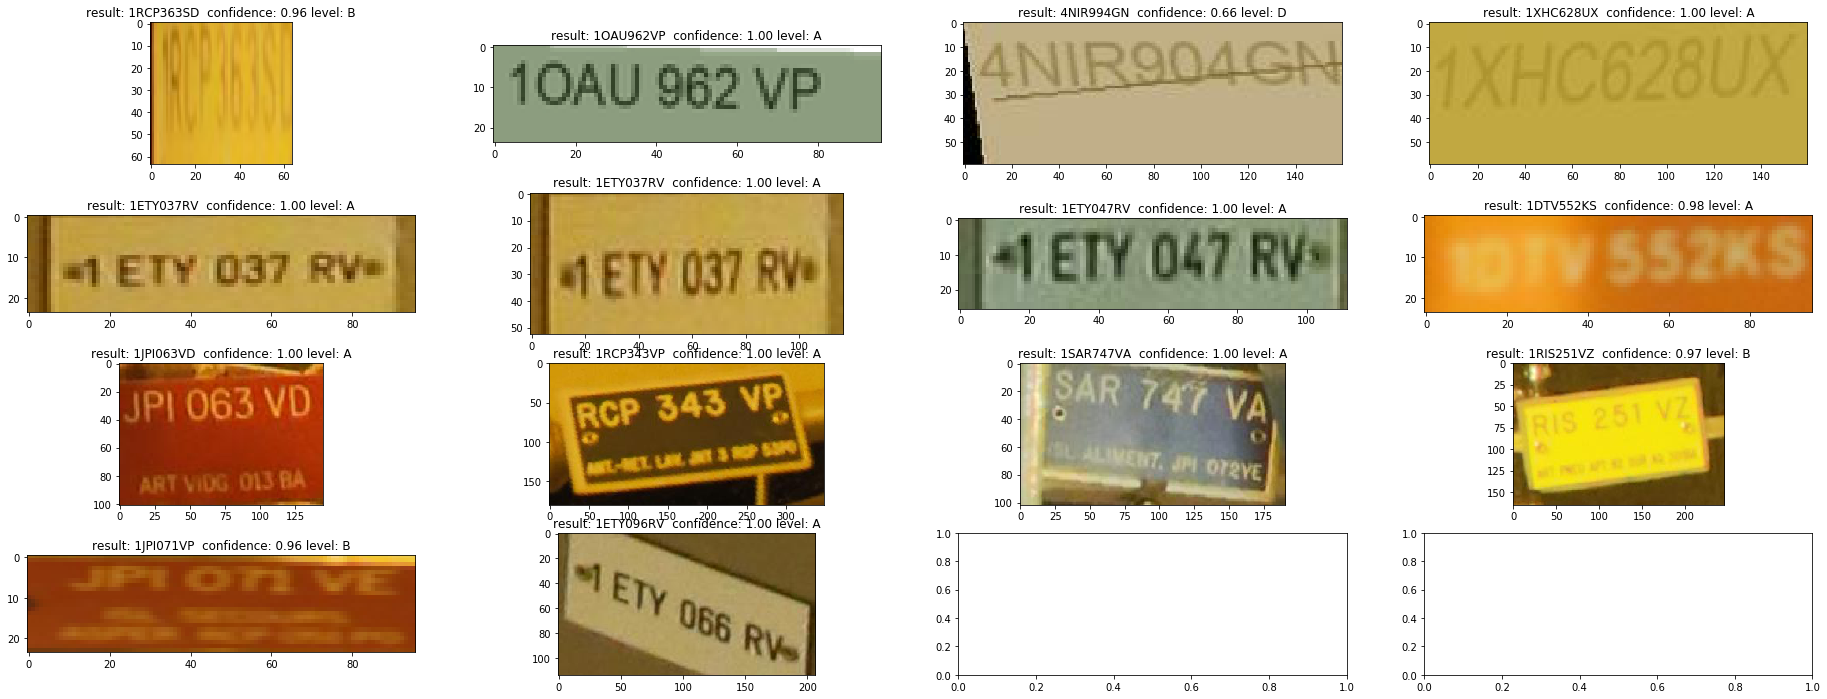

In [36]:
prediction = True
log = open(imagePath + 'log.txt', 'r')
logf = log.readlines()
sum, sum0, sum1, sum2, sum3, sum4 = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
list0, list1, list2, list3, list4 = [], [], [], [], []
for res in logf:
    sum += 1.0
    r1 = res.split(' ')[0].split('_')[-1].split('.')[0]
    r2 = res.split(' ')[1]
    dis = edit_distance(r1[-8:], r2[-8:])
    lv = level(res.split(' ')[2])
    if prediction:
        list0.append([res.split(' ')[0], res.split(' ')[1], res.split(' ')[2]])
        continue
    if dis == 0:
        sum0 += 1.0
        list0.append([res.split(' ')[0], res.split(' ')[1], res.split(' ')[2]])
    elif dis == 1:
        sum1 += 1.0
        list1.append([res.split(' ')[0], res.split(' ')[1], res.split(' ')[2]])
    elif dis == 2:
        sum2 += 1.0
        list2.append([res.split(' ')[0], res.split(' ')[1], res.split(' ')[2]])
    elif dis == 3:
        sum3 += 1.0
        list3.append([res.split(' ')[0], res.split(' ')[1], res.split(' ')[2]])
    else:
        sum4 += 1
        list4.append([res.split(' ')[0], res.split(' ')[1], res.split(' ')[2]])

if not prediction:
    print("\n Rotated Prediction: correct: %.2f%%," %(sum0 / sum * 100.0) + " 1 fault: %.2f%%," % (sum1 / sum * 100.0) + " 2 faults: %.2f%%," %(sum2 / sum * 100.0) + " 3 faults: %.2f%%,"%(sum3 / sum * 100.0)+ " 3+ faults: %.2f%%"%(sum4 / sum * 100.0))
    print("\n Correct:")
    plot(list0)
    print("\n 1 fault:")
    plot(list1)
    print("\n 2 faults:")
    plot(list2)
    print("\n 3 faults:")
    plot(list3)
    print("\n 3+ faults:")
    plot(list4)
else:
    print("Predictions:")
    plot(list0)